# Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept,we'll pursue the project. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [5]:
heart = pd.read_csv("heart-disease.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart.shape

(303, 14)

In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


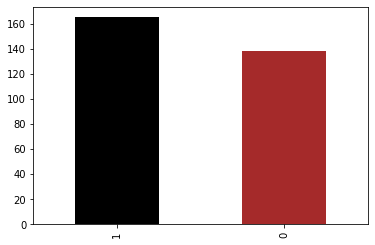

In [9]:
heart["target"].value_counts().plot(kind="bar",color=["black","brown"])

In [10]:
heart.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(heart.target,heart.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [12]:
pd.crosstab(heart.target,heart.sex).plot(kind="bar",
                                        figsize=(10,6),
                                        color=["black","brown"])
plt.title("Heart Disease Classification")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("No of people")
plt.legend((["Female","Male"]))ax = 

SyntaxError: invalid syntax (<ipython-input-12-6bd22a6067b6>, line 7)

In [13]:
heart["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

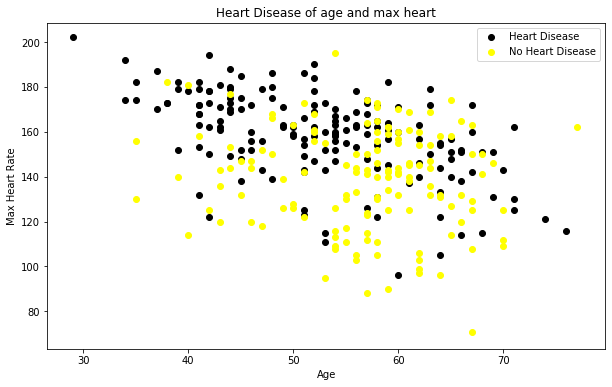

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(heart.age[heart.target==1],
          heart.thalach[heart.target==1],
           c="black")
plt.scatter(heart.age[heart.target==0],
           heart.thalach[heart.target==0],
           c = "yellow")
plt.title("Heart Disease of age and max heart")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease","No Heart Disease"])

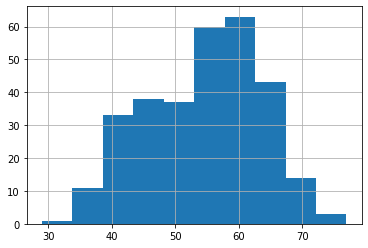

In [15]:
heart.age.hist();

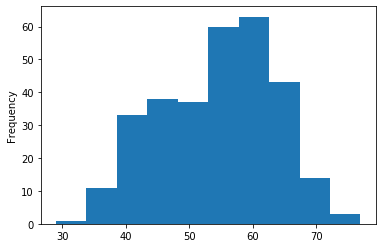

In [16]:
heart.age.plot.hist();

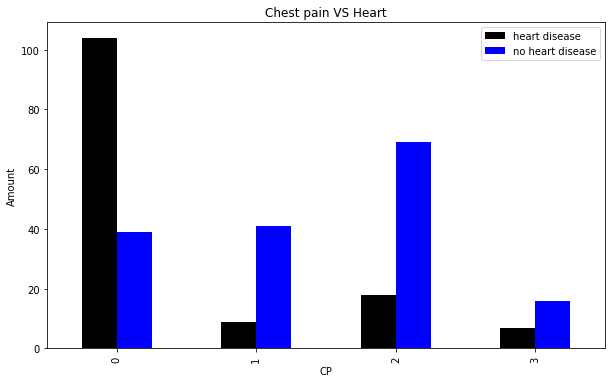

In [17]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(10,6),color=["black","blue"]);
plt.title("Chest pain VS Heart")
plt.xlabel("CP")
plt.ylabel("Amount")
plt.legend(["heart disease","no heart disease"])
plt.xticks(rotation=90);

In [18]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


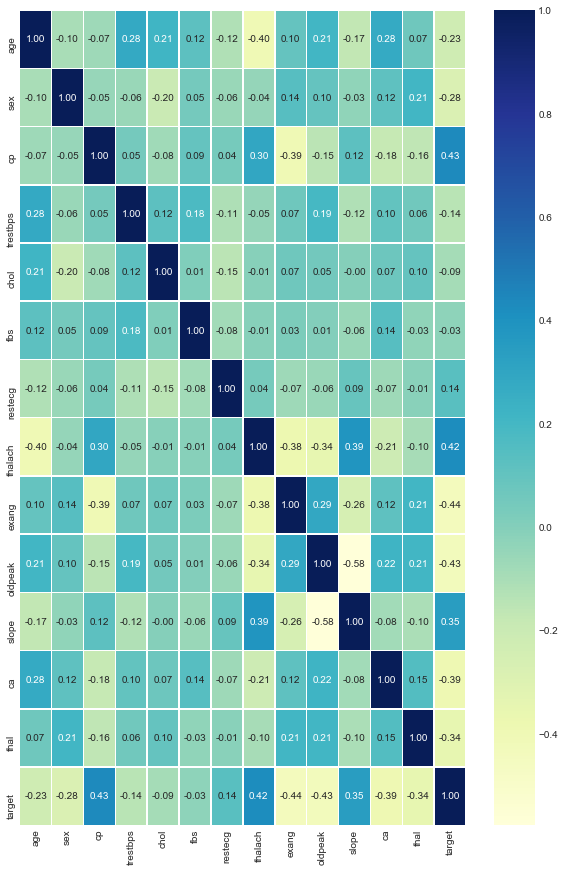

In [19]:
plt.style.use('seaborn-whitegrid')
corr_matrix = heart.corr()
fig,ax = plt.subplots(figsize=(10,15))
ax = sns.heatmap(corr_matrix,annot=True,
                linewidths=0.5,fmt=".2f",
                cmap="YlGnBu")

## 5.Modelling`

In [20]:
 heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
x = heart.drop("target",axis=1)
y = heart["target"]

In [22]:
np.random.seed(42)
x_train, x_test , y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
len(x_train)

242

In [24]:
len(y_train)

242

In [25]:
# Putitng models in dictionary 
models = {"Logistic Regression" : LogisticRegression(),
         "KN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}
#Create a function to fit and score model
def fit_and_score(models, x_train,x_test,y_train,y_test):
    np.random.seed(42)
    #Make a dictionary to keep model scores 
    model_scores = {}
    for name,model in models.items():
        # Fit the model to the data 
        model.fit(x_train,y_train)
       # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\Siddhu\Desktop\ML\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparison

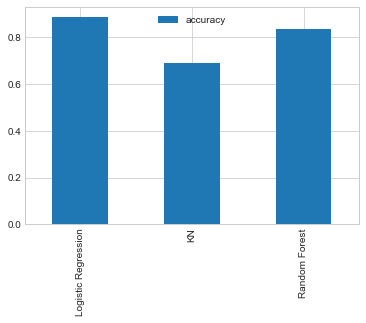

In [27]:
model_compare = pd.DataFrame(model_scores,index = ["accuracy"])
model_compare.T.plot.bar();

 Lets take a look at the following 
  * Hyperparameter tuning
  * Feature importance 
  * Confusion matix
  * Cross-Validation
  * Precision
  * Recall
  * F1-score
  * Classification report 
  * ROC curve
  * Area under curve(AUC)

# Hyperparameter tunning (by hand )

In [28]:
# Its for KNeKNeighborsClassifier
train_scores = []
test_scores  = []

neighbours = range(1,21)

knn = KNeighborsClassifier()
for i in neighbours:
    knn.set_params(n_neighbors=i) 
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    


In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on the test data: 75.41%


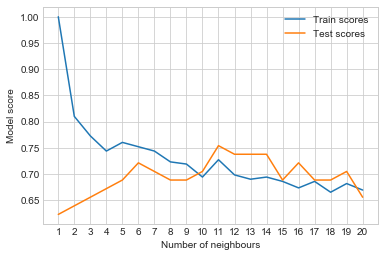

In [31]:
plt.plot(neighbours,train_scores,label="Train scores");
plt.plot(neighbours,test_scores,label="Test scores");
plt.xlabel("Number of neighbours")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model score")
plt.legend()
print(f"Max KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tunning with RandomizedSearchCV
We're going to tune :
* LogisticRegression()
* RandomForestClassifier()

...using randamized search cv

## Hyperparameter tuning with                         RandomizedSearchCV


In [32]:
# Create a grid LR

In [33]:
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]
               }
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [34]:
np.random.seed(42)
# Setup for random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                               cv=50,
                               n_iter=20,
                               verbose = True)

#Fit random  hyperparamter search model for LogisticRegression 
rs_log_reg.fit(x_train,y_train)

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.1s finished


RandomizedSearchCV(cv=50, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C'...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [36]:
 rs_log_reg.score(x_test,y_test)

0.8524590163934426

Now we have tuned logistic regression now its time for RandomForestClassifier()....

In [37]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
#Fit random forest hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [38]:
# Findd the beat hyperparameter 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
# Evaluate the rand
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV
Since Logistic Regression is giving max score we will tune it in GridSearchcv

In [40]:
log_reg_grid = { "C": np.logspace(-4,4,30),
               "solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

* ROC curve and AuC score
* Confusion matrix
* Precision
* Recall 
* F1-score

.....and it would be great if cross-validation was used where possiblem


In [43]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [44]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
 y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

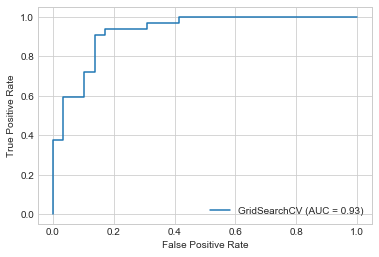

In [46]:
plot_roc_curve(gs_log_reg,x_test,y_test)

In [47]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [1]:
#sns.set(font_scale=2.0)

def plot_conf_mat(y_test,y_preds): 
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                      annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

NameError: name 'y_test' is not defined

In [49]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

We're going to calculate precision,recall and f1-score of our model using cross-validation and to do we'll be using `cross_val_score`.

In [50]:
 gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
# Cross-validated accuraccy

cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")

In [54]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [55]:
# Cross-validated precision
cv_prec = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision")
cv_prec=np.mean(cv_prec)
cv_prec

0.8207936507936507

In [56]:
# Cross-validated reacll
cv_rec = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring = "recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [57]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

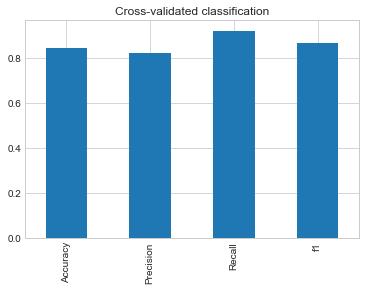

In [58]:
#Viualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall" : cv_rec,
                           "f1":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification",
                     legend=False);

## Feature Importance
Feature importance is another as asking,"which features contributed most to the outcomes of the model & how did they contribute?"

Finding feature importance is diffrent for each machine learning model.

Let's find the feature importance of our logistic regression

In [59]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
clf = LogisticRegression(C=0.2043359717856941,
                        solver = "liblinear")
clf.fit(x_train,y_train);

In [61]:
clf.coef_

array([[ 0.00316728, -0.86044675,  0.66067032, -0.01156993, -0.00166374,
         0.04386101,  0.31275865,  0.02459361, -0.60413095, -0.5686279 ,
         0.45051633, -0.63609907, -0.67663375]])

In [62]:
feature_dict = dict(zip(heart.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672826920952995,
 'sex': -0.8604467486012297,
 'cp': 0.6606703194412813,
 'trestbps': -0.011569933459804503,
 'chol': -0.00166374330184703,
 'fbs': 0.04386101138869136,
 'restecg': 0.3127586501637699,
 'thalach': 0.024593613638248947,
 'exang': -0.6041309457266489,
 'oldpeak': -0.5686278970594651,
 'slope': 0.4505163301195827,
 'ca': -0.6360990727626828,
 'thal': -0.6766337467434816}

`It shows how much each column contribute to target variable`

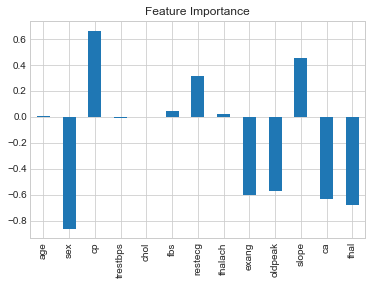

In [63]:
feature = pd.DataFrame(feature_dict,index=[0])
feature.T.plot.bar(title="Feature Importance",legend=False);

In [64]:
#Comparing with targets
pd.crosstab(heart["sex"],heart["target"])

target,0,1
sex,,
0,24,72
1,114,93


It's a negative corelation as sex value increases target value decreases

In this case the ratio decreases 

In [65]:
pd.crosstab(heart["cp"],heart["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


It's a positive correlation similarly 

Based on this we can predict which column is more important and which we can neglect in future

## Experimentation
If you haven't hit your evaluation metric yet.... ask yoursself...
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models?
